In [1]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [2]:
import os

def find_reports_in_onedrive():
    """
    Scans the subfolders under the current user's OneDrive folder (including variations like 'OneDrive - Company Name')
    and returns the paths of all folders with the prefix 'reports'.

    Returns:
        list: A list of full paths to folders starting with 'reports', or an empty list if none are found.
    """
    # Get the base path to the user's home directory
    user_home = os.path.expanduser("~")

    # Find the OneDrive folder (handles variations like "OneDrive - Company Name")
    onedrive_folder = None
    for folder in os.listdir(user_home):
        if folder.startswith("OneDrive -"):
            onedrive_folder = os.path.join(user_home, folder)
            break

    if not onedrive_folder:
        raise FileNotFoundError("OneDrive folder not found for the current user.")

    # Search for folders with the prefix 'reports' in the OneDrive directory
    report_folders = []
    for root, dirs, files in os.walk(onedrive_folder):
        for dir_name in dirs:
            if dir_name.lower().startswith("reports"):
                report_folders.append(os.path.join(root, dir_name))

    return report_folders

In [3]:
reports_paths=find_reports_in_onedrive()
reports_paths

['C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_control_variables_refinacion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_cuchillas',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_eventos',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_humidity_measures',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_ops_pendings',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_pre-usos_diligenciamiento_no_cumple',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_quality_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_refination_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\control_room\\reports_causa_rechazos']

In [4]:
str_folder_searcher="reports_visualizacion_data_produccion"
for report_path in reports_paths:
    if str_folder_searcher in report_path:
        path=Path(reports_paths[reports_paths.index(report_path)])
path=Path.joinpath(path,r"source_and_return_data")
path

WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data')

In [5]:
os.chdir(path) #change working directory to respective reports folder
os.getcwd()

'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion\\source_and_return_data'

In [6]:
directory = Path.joinpath(path,"data_plots") #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_aperturas_nariz.xlsx'), WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_causa_rechazos.xlsx')]


In [7]:
dict_data_pointer={} #dict to store files as dfs
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    df = pd.read_excel(file_path)
    print(file_path)
    df_name=file_path.split("obj_")[1].split(".")[0] #split str with "obj_" and the  "." char and take the file name
    date_col="Fecha" #default col name with dates
    if "aperturas" in file_path.lower(): #if excel name file contains "aperturas", change col name with dates
        date_col="Fecha Paro"
    row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
    dict_data_pointer[f"{df_name}"]=filtered_df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_aperturas_nariz.xlsx
C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_causa_rechazos.xlsx
['aperturas_nariz', 'causa_rechazos']


In [8]:
df_root=dict_data_pointer['aperturas_nariz']
df_root[df_root["Fecha Paro"]=="NaT"]

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1


In [9]:
df_root

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PARO PROGRAMADO,2025-02-01,09:00:00,13:00:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,LIMPIEZA DE EQUIPOS - PRO,se para linea para realizar limpiesa a secader...,240.01,2,9,153659
1,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:00:00,13:02:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",2.00,3,9,153659
2,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:10:00,13:18:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",8.00,3,9,153659
3,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:25:00,13:36:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",11.00,3,9,153659
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",ELÉCTRICO,2025-02-01,13:48:00,14:07:00,400.402.00 BUNKER DE FORMACION,FALLA DE MOTOR - ELC,"se va a fallo en esparcidor #3 , se da reset ,...",19.00,3,9,153659
5,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PRODUCCIÓN,2025-02-01,20:20:00,20:35:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,VARIACION TEMPERATURA - PRO,se presento un variacion de alta temperatura e...,15.00,3,9,153659
6,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-02,09:51:00,09:53:00,400 FORMACION Y PREPRENSA,DETECCIÓN DE METAL - MEC,Metal banda 415,2.00,2,9,153660


In [10]:
df_pro=df_root[df_root["Tipo Paro"].str.contains("PRODUCCIÓN")]
#df_pro.set_index([pd.Index(range(len(df_pro)))],inplace=True)
df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #
df_pro['Fecha Paro']

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_25668\1638482938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #


5    2025-02-01
6    2025-02-02
Name: Fecha Paro, dtype: object

# Drop duplicate apertures

In [11]:
dates_ar=[date for date in df_pro["Fecha Paro"].unique()]
dates_ar

['2025-02-01', '2025-02-02']

In [12]:
list_dropped_idx_rows=[]
for date_ar in dates_ar:
    print(date_ar)
    df_seeker=df_pro.loc[df_pro["Fecha Paro"]==date_ar] #filter by date
    rows_df_seeker=df_seeker.index #get idx of df for current date
    last_row=rows_df_seeker[-1] #to avoid out of range
    print(last_row)
    for idx,row in enumerate(rows_df_seeker):
        print(f"{row} from {len(rows_df_seeker)}")
        if row==last_row:
            continue #jump to next date
        if df_seeker.at[row,"Hora Final"]==df_seeker.at[rows_df_seeker[idx+1],"Hora Inicial"]:
            list_dropped_idx_rows.append(row+1) #add idx to be dropped
    print("idxs to drop are {}".format(list_dropped_idx_rows))
df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date
df_pro

2025-02-01
5
5 from 1
idxs to drop are []
2025-02-02
6
6 from 1
idxs to drop are []


C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_25668\3455869565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date


,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
5,CRUDO,300 - SECADO PRIMERA Y SEGUNDA ETAPA,PRODUCCIÓN,2025-02-01,20:20:00,20:35:00,300 SECADO PRIMERA Y SEGUNDA ETAPA,VARIACION TEMPERATURA - PRO,se presento un variacion de alta temperatura e...,15.0,3,9,153659
6,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-02-02,09:51:00,09:53:00,400 FORMACION Y PREPRENSA,DETECCIÓN DE METAL - MEC,Metal banda 415,2.0,2,9,153660


In [13]:
df_count_fail_mode_equipment=df_pro.groupby(by=["Fecha Paro","Modo de Fallo","Descripción Equipo"]).count().loc[:,"Linea"]
df_count_fail_mode_equipment

Fecha Paro  Modo de Fallo                Descripción Equipo                
2025-02-01  VARIACION TEMPERATURA - PRO  300 SECADO PRIMERA Y SEGUNDA ETAPA    1
2025-02-02  DETECCIÓN DE METAL - MEC     400 FORMACION Y PREPRENSA             1
Name: Linea, dtype: int64

In [14]:
multi_index_from_df=list(df_count_fail_mode_equipment.index)
multi_index_from_df

[('2025-02-01',
  'VARIACION TEMPERATURA - PRO',
  '300 SECADO PRIMERA Y SEGUNDA ETAPA'),
 ('2025-02-02', 'DETECCIÓN DE METAL - MEC', '400 FORMACION Y PREPRENSA')]

In [15]:
dates=sorted(list(set([multi_index[0] for multi_index in multi_index_from_df ])))
dates

['2025-02-01', '2025-02-02']

In [16]:
fail_modes=sorted(list(set([multi_index[1] for multi_index in multi_index_from_df ])))
fail_modes

['DETECCIÓN DE METAL - MEC', 'VARIACION TEMPERATURA - PRO']

In [17]:
equipments=sorted(list(set([multi_index[2] for multi_index in multi_index_from_df ])))
equipments

['300 SECADO PRIMERA Y SEGUNDA ETAPA', '400 FORMACION Y PREPRENSA']

In [18]:
df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)
df_stacked_data

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_25668\558380705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)


,DETECCIÓN DE METAL - MEC,VARIACION TEMPERATURA - PRO
2025-02-01,0,0
2025-02-02,0,0


In [19]:
acronyms=lambda x:"\n"+''.join(w[0] for w in x.split("- PRO")[0].split() if w[0].isupper())
dict_stacked_values={fail_mode:[""]*len(dates) for fail_mode in fail_modes}
for date,fail_mode,equip in multi_index_from_df:
    print(date,fail_mode)
    count_by_date_by_fail_mode_by_equipment= df_count_fail_mode_equipment[date,fail_mode].sum() # df_count_fail_mode_equipment.at[date,fail_mode,equip]
    print(count_by_date_by_fail_mode_by_equipment)
    value_label_plus_equip=str(count_by_date_by_fail_mode_by_equipment)+f" {acronyms(fail_mode)}" # equip.split(" ")[0]+":"+
    print("valor mas equipo: ",value_label_plus_equip)
    df_stacked_data.loc[date,fail_mode]=count_by_date_by_fail_mode_by_equipment
    idx_date=dates.index(date)
    dict_stacked_values[fail_mode][idx_date]=value_label_plus_equip
    dict_stacked_values[fail_mode][idx_date]
dict_stacked_values

2025-02-01 VARIACION TEMPERATURA - PRO
1
valor mas equipo:  1 
VT
2025-02-02 DETECCIÓN DE METAL - MEC
1
valor mas equipo:  1 
DDMM


{'DETECCIÓN DE METAL - MEC': ['', '1 \nDDMM'],
 'VARIACION TEMPERATURA - PRO': ['1 \nVT', '']}

In [20]:
df_stacked_data

,DETECCIÓN DE METAL - MEC,VARIACION TEMPERATURA - PRO
2025-02-01,0,1
2025-02-02,1,0


In [21]:
list_count_by_fail_mode_per_date=list(df_stacked_data.T.values)
weight_counts={" ".join(fail_mode.split("-")[0].split()).lower()+":"+acronyms(fail_mode.upper()):list_count_by_fail_mode_per_date[idx] for idx,fail_mode in enumerate(fail_modes)}
weight_counts

{'detección de metal:\nDDMM': array([0, 1]),
 'variacion temperatura:\nVT': array([1, 0])}

In [22]:
for new_key,old_key in zip(weight_counts.keys(),fail_modes):
    dict_stacked_values[new_key] = dict_stacked_values.pop(old_key)
dict_stacked_values

{'detección de metal:\nDDMM': ['', '1 \nDDMM'],
 'variacion temperatura:\nVT': ['1 \nVT', '']}

# Plot

In [23]:
colors_available=mcolors.TABLEAU_COLORS
colors_available

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [24]:
"""
colors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}
colors_choosen
"""

'\ncolors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}\ncolors_choosen\n'

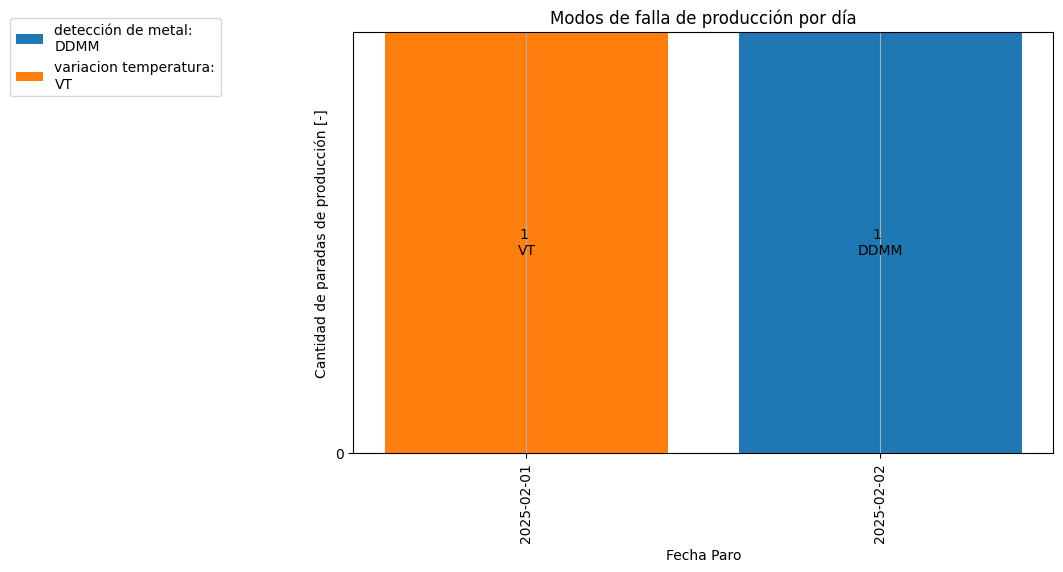

In [25]:
fig, ax = plt.subplots()
fig.tight_layout()  # Adjust layout to prevent clipping of labels
#fig.set_figheight(8)
fig.set_figwidth(7.9)
#fig.set_size_inches(50, 40) #set plot size
#plot aperturas
amt_dates=len(dates)
bottom = np.zeros(amt_dates) #initial axis for stacked bars plotting
plt.grid() #make grid mesh
max_bottom=0 #to store max of bottoms in construction of bar
for (data_label,weight_count),bar_value_stick in zip(weight_counts.items(),dict_stacked_values.values()): # ,colors_choosen run through dates, rejected per cause per dates, labels of values of rejected per cause per day 
    p = ax.bar(dates, weight_count,label=data_label,bottom=bottom) # ,color=color_cause take bar plot elements: rectangle(attribute 1, attribute 2, ...)
    bottom += weight_count #make new start to plot next top rectangle
    check_bottom=np.max(bottom)
    if check_bottom>max_bottom:
        max_bottom=check_bottom #to generate ylim of causas rechazos
    ax.bar_label(p,labels=bar_value_stick,label_type='center',color="black") #   add bar height str value on bar center
leq=ax.legend(bbox_to_anchor=(-0.5,1.05),loc="upper left") #generate legend box for bar plot
amt_xticks=range(len(dates))
ax.set_xticks(amt_xticks)
ax.set_xticklabels(dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
ax.set_xlabel("Fecha Paro") #name of bar plot x axis
amt_stops_per_fail_mode=np.array(list(weight_counts.values()))
max_y_axis=np.max(amt_stops_per_fail_mode) #get max of all data
ax.set_yticks(np.arange(0, max_y_axis*(1.40), 2)) #set y axis label values: axis pitch=10 unds
ax.set_ylabel("Cantidad de paradas de producción [-]") #y axis name for bar plot
ax.set_aspect('auto')
imgs_folder="/imgs_reports_daily" #str with name to save plots
imgs_type_folder="/fail_modes_equipments"
imgs_year_folder=f"/year_{dates[0].split("-")[0]}"
imgs_month_folder=f"/month_{dates[0].split("-")[1]}"
img_name="/fail_modes_PRO_per_Type" #name of img file
str_today=datetime.today().strftime('%Y-%m-%d') #asign date of generation
plt.title("Modos de falla de producción por día") #make title
directory_to_save = Path(str(directory)+imgs_folder+imgs_type_folder+imgs_year_folder+imgs_month_folder) # get directory to save plot
directory_to_save.mkdir(exist_ok=True)
plt.savefig(str(directory_to_save)+img_name+dates[0]+"_"+dates[-1]+"_"+str_today+".png", bbox_inches='tight') #store img plot
plt.show()